# Basic PyTorch Neural Network

* create a multi-layer deep learning model
* load data
* train and validate the model<br>

* save and load a trained model(last)

Our goal -
To develop a model capable of classifying an iris plant based on four features. 

- This is a multi-class classification where each sample can belong to ONE of 3 classes (<em>Iris setosa</em>, <em>Iris virginica</em> or <em>Iris versicolor</em>).
- The network will have 4 input neurons (flower dimensions) and 3 output neurons (scores).
- Our loss function will compare the target label (ground truth) to the corresponding output score. 

<a><h3><u> Standard imports

In [186]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a><h3><u> Create a Model Class

In [187]:
# input - 4 features so 4 NEURONS
# 2 hiden layers of 8, 9 NEURONS each
# output layer  = 3 categories so , 3 NEURONS

# pre activation function - (aggregator) - Linear function - W*X+B
# Activation function - Relu

# loss - Cross Entropy (as we need probabilities)
# algorithm - Adam 

In [188]:
# ___init__ should contain how many layers we need
# input Layer (4 features) ---> h1 (8N) ---> h2 (9N) ---> O/P (3 classes)

In [189]:
class Model(nn.Module):
    def __init__ (self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        # fc1 - fully connected layer 1
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

        # for simplicity we used x in all three statements
        # x1 = F.relu(self.fc1(x))
        # x2 = F.relu(self.fc2(x1))
        # x3 = self.out(x2)
        # return x3

In [190]:
# Instantiate the Model class using parameter defaults:
torch.manual_seed(32)
model = Model()

<a><h3><u> Load the iris Dataset

In [191]:
df= pd.read_csv("Data/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<a> <h> Plot the Dataset

<a><h3> <u> Perform Train/Test/Split


In [192]:
X=df.drop('target',axis=1).values
y= df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


<a><u><h3> Prepare DataLoader

Even though our dataset is small (120 training samples), we'll load it into our model in two batches. This technique becomes very helpful with large datasets.

Note that scikit-learn already shuffled the source dataset before preparing train and test sets.

In [193]:
trainloader = DataLoader(X_train, batch_size=60,shuffle=True)

testloader = DataLoader(X_test, batch_size=60,shuffle=False)

<a><h3><u> Define loss equations and optimizations


In [194]:
# FOR REDO
torch.manual_seed(4)
model = Model()

In [195]:
#Loss Function - cros Entropy
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

<a><h3><u> Train the Model

In [196]:
epochs = 100
losses = []

for i in range(epochs):

    i=i+1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

# a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:  1  loss: 1.09568226
epoch: 11  loss: 0.98190629
epoch: 21  loss: 0.75652379
epoch: 31  loss: 0.49447367
epoch: 41  loss: 0.34981725
epoch: 51  loss: 0.22807980
epoch: 61  loss: 0.13547555
epoch: 71  loss: 0.09162237
epoch: 81  loss: 0.07378435
epoch: 91  loss: 0.06546316


<a><h3><u> Plot the Loss Function

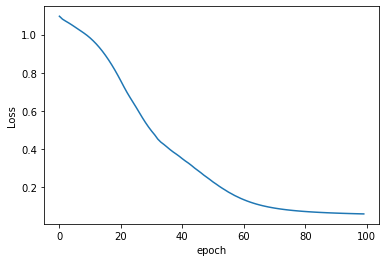

In [197]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

<a><h3><u> Validate the Model

- Torch.no_grad() deactivates autograd engine.

- Eventually it will reduce the memory usage and speed up computations.

- Use of Torch.no_grad():

    * To perform inference without Gradient Calculation.

    * To make sure there's no leak test data into the model.


In [198]:
# To Evaluate the Entire Test set
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val , y_test)
print(f'{loss:.8f}')

0.06247772
